# Ejercicio 1

## Preparacion de datos

In [2]:
import csv

# Leer archivo de texto
with open('datos.txt', 'r') as file:
    lines = file.readlines()

# Procesar puntos
puntos = []
for line in lines:
    line = line.strip()
    if line.startswith('(') and line.endswith(')'):
        try:
            # Eliminar paréntesis y dividir por coma
            x_str, y_str = line[1:-1].split(',')
            x = float(x_str.strip())
            y = float(y_str.strip())
            puntos.append((x, y))
        except ValueError:
            print(f"⚠️ Línea inválida (no numérica): {line}")
    else:
        print(f"⚠️ Formato inesperado: {line}")

# Guardar como CSV
with open('datos.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['X', 'Y'])  # encabezados
    writer.writerows(puntos)

print("✅ Archivo 'datos.csv' generado exitosamente.")


✅ Archivo 'datos.csv' generado exitosamente.


## Grafico 

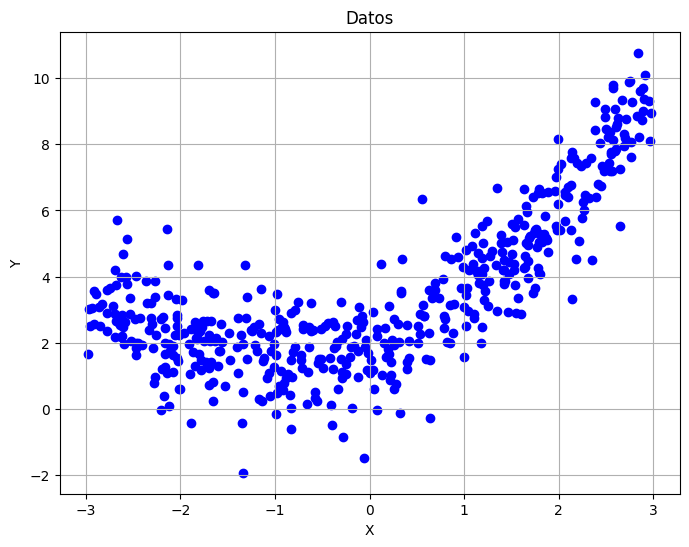

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo CSV
df = pd.read_csv('datos.csv')

# Graficar
plt.figure(figsize=(8,6))
plt.scatter(df['X'], df['Y'], color='blue', marker='o')

plt.title('Datos')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Ejemplo a seguir

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


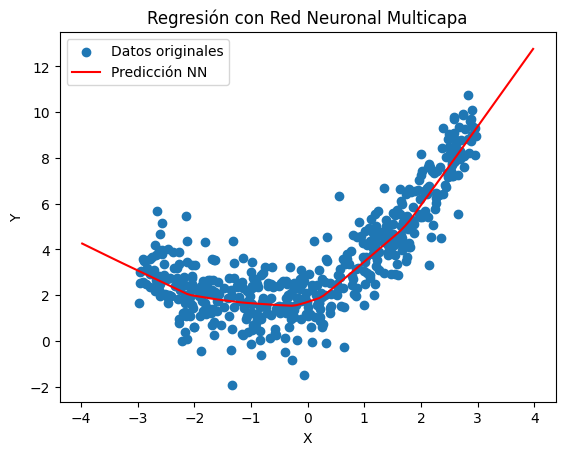

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Paso 1: Cargar datos desde CSV (asumiendo que tiene columnas 'x' y 'y')
df = pd.read_csv('datos.csv')  # reemplaza con tu ruta si es otra

# Paso 2: Convertir columnas a np.array
x = df['X'].values
y = df['Y'].values

# Paso 3: Definir el modelo de red neuronal para regresión
model = Sequential([
    Input(shape=(1,)),            # capa entrada unidimensional
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)                     # salida para regresión
])

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Paso 5: Entrenar el modelo
history = model.fit(x, y, epochs=200, verbose=0)

# Paso 6: Predecir para graficar
x_pred = np.linspace(min(x)-1, max(x)+1, 100)
y_pred = model.predict(x_pred)

# Paso 7: Graficar datos y predicción
plt.scatter(x, y, label='Datos originales')
plt.plot(x_pred, y_pred, color='red', label='Predicción NN')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión con Red Neuronal Multicapa')
plt.show()

## RED NEURONAL DE REGRESION

In [15]:
import random
import matplotlib.pyplot as plt
import time

X = [p[0] for p in puntos]
Y = [p[1] for p in puntos]

min_x, max_x = min(X), max(X)
min_y, max_y = min(Y), max(Y)

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val) if max_val != min_val else 0.0

def denormalize(value, min_val, max_val):
    return value * (max_val - min_val) + min_val

X_norm = [normalize(x, min_x, max_x) for x in X]
Y_norm = [normalize(y, min_y, max_y) for y in Y]

def relu(x):
    return max(0, x)

def relu_derivative(x):
    return 1 if x > 0 else 0

def entrenar_red(num_capas_ocultas, neuronas_por_capa, epochs=500, lr=0.01):
    start_time = time.time()  # <-- Inicio del tiempo

    random.seed(42)
    capas = []
    entradas = 1

    for _ in range(num_capas_ocultas):
        pesos = [[random.uniform(-1,1) for _ in range(entradas)] for _ in range(neuronas_por_capa)]
        sesgos = [random.uniform(-1,1) for _ in range(neuronas_por_capa)]
        capas.append((pesos, sesgos))
        entradas = neuronas_por_capa

    w_output = [random.uniform(-1,1) for _ in range(entradas)]
    b_output = random.uniform(-1,1)

    for epoch in range(epochs):
        total_loss = 0
        for x, y_true in zip(X_norm, Y_norm):
            activaciones = []
            entradas_actuales = [x]

            # Forward
            for pesos, sesgos in capas:
                salida = []
                for i in range(len(pesos)):
                    z = sum(pesos[i][j] * entradas_actuales[j] for j in range(len(pesos[i]))) + sesgos[i]
                    salida.append(relu(z))
                activaciones.append((entradas_actuales, salida))
                entradas_actuales = salida

            y_pred = sum(w_output[j] * entradas_actuales[j] for j in range(len(w_output))) + b_output
            error = y_pred - y_true
            total_loss += error**2

            # Backward
            d_loss_y_pred = 2 * error
            d_w_output = [d_loss_y_pred * entradas_actuales[j] for j in range(len(entradas_actuales))]
            d_b_output = d_loss_y_pred

            d_activacion = [d_loss_y_pred * w_output[j] for j in range(len(w_output))]

            for capa_idx in reversed(range(len(capas))):
                entradas_previas, activaciones_actuales = activaciones[capa_idx]
                pesos, sesgos = capas[capa_idx]

                d_z = [d_activacion[i] * relu_derivative(activaciones_actuales[i]) for i in range(len(activaciones_actuales))]

                d_w = [[d_z[i] * entradas_previas[j] for j in range(len(entradas_previas))] for i in range(len(d_z))]
                d_b = d_z

                if capa_idx > 0:
                    d_activacion = [0] * len(capas[capa_idx - 1][0])
                    for j in range(len(d_activacion)):
                        d_activacion[j] = sum(d_z[k] * pesos[k][j] for k in range(len(d_z)))

                # Actualización
                for i in range(len(pesos)):
                    for j in range(len(pesos[i])):
                        pesos[i][j] -= lr * d_w[i][j]
                    sesgos[i] -= lr * d_b[i]

                capas[capa_idx] = (pesos, sesgos)

            for j in range(len(w_output)):
                w_output[j] -= lr * d_w_output[j]
            b_output -= lr * d_b_output

        if (epoch + 1) % 50 == 0:
            print(f"[{num_capas_ocultas}x{neuronas_por_capa}] Epoch {epoch+1} - Loss: {total_loss/len(X_norm):.6f}")

    duracion = time.time() - start_time  # <-- Fin del tiempo
    print(f"Tiempo de entrenamiento para red {num_capas_ocultas}x{neuronas_por_capa}: {duracion:.2f} segundos\n")

    # Predicción
    X_test_norm = [i/100 for i in range(101)]
    Y_pred_norm = []

    for x in X_test_norm:
        salida = [x]
        for pesos, sesgos in capas:
            salida = [relu(sum(pesos[i][j] * salida[j] for j in range(len(salida))) + sesgos[i]) for i in range(len(pesos))]
        y_pred = sum(w_output[j] * salida[j] for j in range(len(salida))) + b_output
        Y_pred_norm.append(y_pred)

    X_test = [denormalize(x, min_x, max_x) for x in X_test_norm]
    Y_pred = [denormalize(y, min_y, max_y) for y in Y_pred_norm]
    
    return X_test, Y_pred



### Prediccion y graficos

[1x5] Epoch 50 - Loss: 0.017950
[1x5] Epoch 100 - Loss: 0.017944
[1x5] Epoch 150 - Loss: 0.017931
[1x5] Epoch 200 - Loss: 0.017928
[1x5] Epoch 250 - Loss: 0.017927
[1x5] Epoch 300 - Loss: 0.017925
[1x5] Epoch 350 - Loss: 0.017922
[1x5] Epoch 400 - Loss: 0.017922
[1x5] Epoch 450 - Loss: 0.017921
[1x5] Epoch 500 - Loss: 0.017920
Tiempo de entrenamiento para red 1x5: 2.96 segundos

[1x10] Epoch 50 - Loss: 0.007038
[1x10] Epoch 100 - Loss: 0.007026
[1x10] Epoch 150 - Loss: 0.007016
[1x10] Epoch 200 - Loss: 0.007008
[1x10] Epoch 250 - Loss: 0.007001
[1x10] Epoch 300 - Loss: 0.006995
[1x10] Epoch 350 - Loss: 0.006989
[1x10] Epoch 400 - Loss: 0.006985
[1x10] Epoch 450 - Loss: 0.006980
[1x10] Epoch 500 - Loss: 0.006974
Tiempo de entrenamiento para red 1x10: 5.04 segundos

[1x15] Epoch 50 - Loss: 0.007452
[1x15] Epoch 100 - Loss: 0.007357
[1x15] Epoch 150 - Loss: 0.007331
[1x15] Epoch 200 - Loss: 0.007309
[1x15] Epoch 250 - Loss: 0.007290
[1x15] Epoch 300 - Loss: 0.007271
[1x15] Epoch 350 - Los

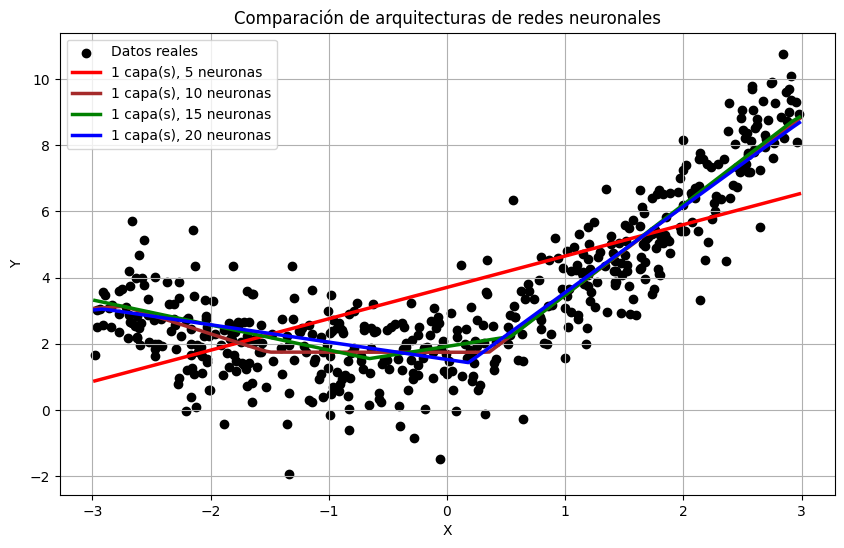

In [16]:
# Comparación
redes = [
    (1, 5),
    (1, 10),
    (1, 15),
    (1, 20),
]

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='black', label='Datos reales')

colores = ['red', 'brown', 'green', 'blue', 'orange', 'purple']
for i, (capas, neuronas) in enumerate(redes):
    X_pred, Y_pred = entrenar_red(capas, neuronas)
    plt.plot(X_pred, Y_pred, color=colores[i], label=f'{capas} capa(s), {neuronas} neuronas', linewidth=2.5)

plt.title("Comparación de arquitecturas de redes neuronales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

[2x5] Epoch 50 - Loss: 0.018204
[2x5] Epoch 100 - Loss: 0.018141
[2x5] Epoch 150 - Loss: 0.018098
[2x5] Epoch 200 - Loss: 0.018066
[2x5] Epoch 250 - Loss: 0.018038
[2x5] Epoch 300 - Loss: 0.018018
[2x5] Epoch 350 - Loss: 0.018012
[2x5] Epoch 400 - Loss: 0.007572
[2x5] Epoch 450 - Loss: 0.007014
[2x5] Epoch 500 - Loss: 0.007020
Tiempo de entrenamiento para red 2x5: 7.56 segundos

[2x10] Epoch 50 - Loss: 0.007922
[2x10] Epoch 100 - Loss: 0.007780
[2x10] Epoch 150 - Loss: 0.007692
[2x10] Epoch 200 - Loss: 0.007626
[2x10] Epoch 250 - Loss: 0.007578
[2x10] Epoch 300 - Loss: 0.007539
[2x10] Epoch 350 - Loss: 0.007512
[2x10] Epoch 400 - Loss: 0.007473
[2x10] Epoch 450 - Loss: 0.007452
[2x10] Epoch 500 - Loss: 0.007425
Tiempo de entrenamiento para red 2x10: 17.53 segundos

[2x15] Epoch 50 - Loss: 0.008403
[2x15] Epoch 100 - Loss: 0.007884
[2x15] Epoch 150 - Loss: 0.007635
[2x15] Epoch 200 - Loss: 0.007478
[2x15] Epoch 250 - Loss: 0.007385
[2x15] Epoch 300 - Loss: 0.007314
[2x15] Epoch 350 - Lo

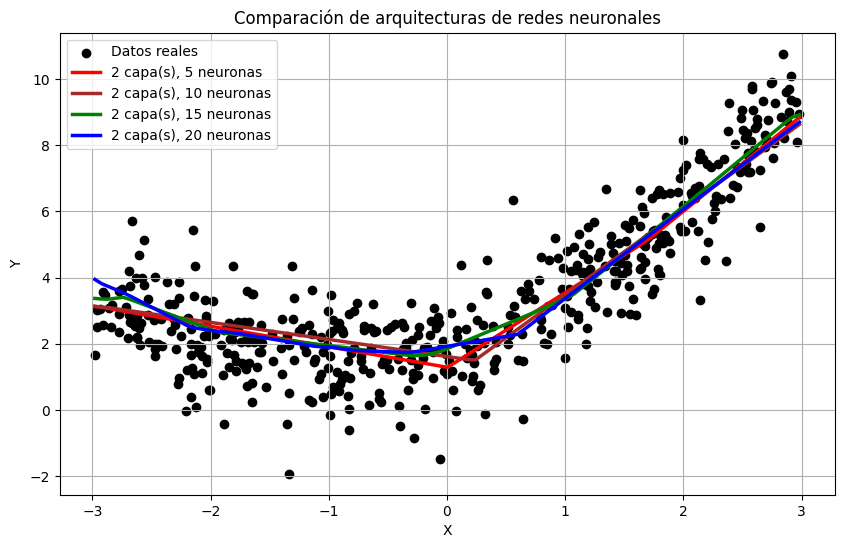

In [17]:
# Comparación
redes = [
    (2, 5),
    (2, 10),
    (2, 15),
    (2, 20),
]

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='black', label='Datos reales')

colores = ['red', 'brown', 'green', 'blue', 'orange', 'purple']
for i, (capas, neuronas) in enumerate(redes):
    X_pred, Y_pred = entrenar_red(capas, neuronas)
    plt.plot(X_pred, Y_pred, color=colores[i], label=f'{capas} capa(s), {neuronas} neuronas', linewidth=2.5)

plt.title("Comparación de arquitecturas de redes neuronales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

[3x5] Epoch 50 - Loss: 0.007468
[3x5] Epoch 100 - Loss: 0.007413
[3x5] Epoch 150 - Loss: 0.007371
[3x5] Epoch 200 - Loss: 0.007276
[3x5] Epoch 250 - Loss: 0.007214
[3x5] Epoch 300 - Loss: 0.007178
[3x5] Epoch 350 - Loss: 0.007158
[3x5] Epoch 400 - Loss: 0.007141
[3x5] Epoch 450 - Loss: 0.007124
[3x5] Epoch 500 - Loss: 0.007115
Tiempo de entrenamiento para red 3x5: 11.90 segundos

[3x10] Epoch 50 - Loss: 0.007479
[3x10] Epoch 100 - Loss: 0.007310
[3x10] Epoch 150 - Loss: 0.007233
[3x10] Epoch 200 - Loss: 0.007155
[3x10] Epoch 250 - Loss: 0.007116
[3x10] Epoch 300 - Loss: 0.007104
[3x10] Epoch 350 - Loss: 0.006910
[3x10] Epoch 400 - Loss: 0.006855
[3x10] Epoch 450 - Loss: 0.006831
[3x10] Epoch 500 - Loss: 0.006815
Tiempo de entrenamiento para red 3x10: 31.92 segundos

[3x15] Epoch 50 - Loss: 0.007853
[3x15] Epoch 100 - Loss: 0.007559
[3x15] Epoch 150 - Loss: 0.007444
[3x15] Epoch 200 - Loss: 0.007371
[3x15] Epoch 250 - Loss: 0.007321
[3x15] Epoch 300 - Loss: 0.007278
[3x15] Epoch 350 - L

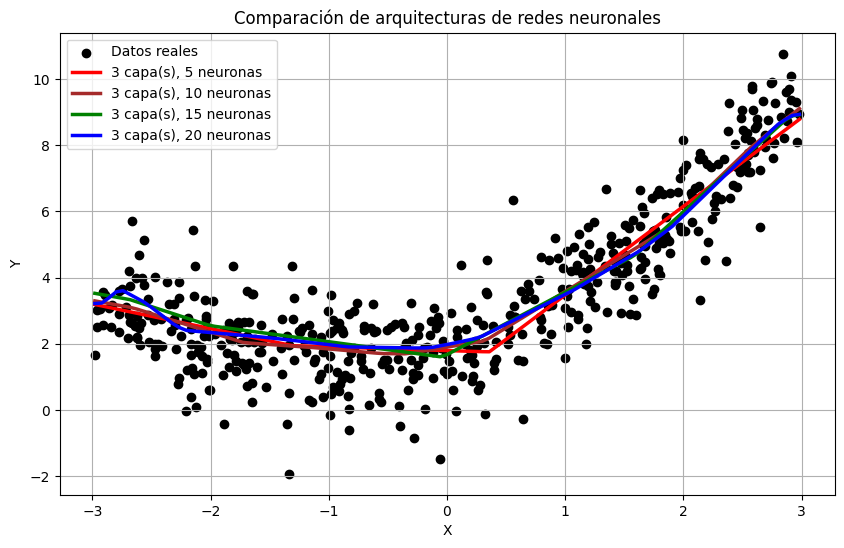

In [18]:
# Comparación
redes = [
    (3, 5),
    (3, 10),
    (3, 15),
    (3, 20),
]

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='black', label='Datos reales')

colores = ['red', 'brown', 'green', 'blue', 'orange', 'purple']
for i, (capas, neuronas) in enumerate(redes):
    X_pred, Y_pred = entrenar_red(capas, neuronas)
    plt.plot(X_pred, Y_pred, color=colores[i], label=f'{capas} capa(s), {neuronas} neuronas', linewidth=2.5)

plt.title("Comparación de arquitecturas de redes neuronales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()